# 第2章 k-近邻算法

![k-近邻算法_首页](../../../images/2.KNN/knn_headPage_xy.png "k-近邻算法首页")

## KNN 概述

`k-近邻（kNN, k-NearestNeighbor）算法主要是用来进行分类的.`

## KNN 场景

电影可以按照题材分类，那么如何区分 `动作片` 和 `爱情片` 呢？<br/>
1. 动作片：打斗次数更多
2. 爱情片：亲吻次数更多

基于电影中的亲吻、打斗出现的次数，使用 k-近邻算法构造程序，就可以自动划分电影的题材类型。

![电影视频案例](../../../images/2.KNN/knn-1-movie.png "电影视频案例")

```
现在根据上面我们得到的样本集中所有电影与未知电影的距离，按照距离递增排序，可以找到 k 个距离最近的电影。
假定 k=3，则三个最靠近的电影依次是， He's Not Really into Dudes 、 Beautiful Woman 和 California Man。
knn 算法按照距离最近的三部电影的类型，决定未知电影的类型，而这三部电影全是爱情片，因此我们判定未知电影是爱情片。
```

## KNN 原理

> KNN 工作原理

1. 假设有一个带有标签的样本数据集（训练样本集），其中包含每条数据与所属分类的对应关系。
2. 输入没有标签的新数据后，将新数据的每个特征与样本集中数据对应的特征进行比较。
    1. 计算新数据与样本数据集中每条数据的距离。
    2. 对求得的所有距离进行排序（从小到大，越小表示越相似）。
    3. 取前 k （k 一般小于等于 20 ）个样本数据对应的分类标签。
3. 求 k 个数据中出现次数最多的分类标签作为新数据的分类。

> KNN 开发流程

```
收集数据：任何方法
准备数据：距离计算所需要的数值，最好是结构化的数据格式
分析数据：任何方法
训练算法：此步骤不适用于 k-近邻算法
测试算法：计算错误率
使用算法：输入样本数据和结构化的输出结果，然后运行 k-近邻算法判断输入数据分类属于哪个分类，最后对计算出的分类执行后续处理
```

> KNN 算法特点

```
优点：精度高、对异常值不敏感、无数据输入假定
缺点：计算复杂度高、空间复杂度高
适用数据范围：数值型和标称型
```


## 代码示例

In [3]:
import os
import operator

import numpy as np

In [8]:
def createDataSet():
    """
    创建数据集和标签

     调用方式
     import kNN
     group, labels = kNN.createDataSet()
    """
    group = array([[1.0, 1.1], [1.0, 1.0], [0, 0], [0, 0.1]])
    labels = ['A', 'A', 'B', 'B']
    return group, labels

group, labels = createDataSet()

print group, group.shape
print labels

[[ 1.   1.1]
 [ 1.   1. ]
 [ 0.   0. ]
 [ 0.   0.1]] (4, 2)
['A', 'A', 'B', 'B']


In [10]:
np.tile?

In [24]:
a = np.array([0.1, 0.1])

print np.tile(a, 2)
print np.tile(a, (4, 1))
print np.tile(a, (4, 1)) ** 2
print (np.tile(a, (4, 1)) ** 2).sum(axis=1)
print (np.tile(a, (4, 1)) ** 2).sum(axis=1) ** 0.5

[ 0.1  0.1  0.1  0.1]
[[ 0.1  0.1]
 [ 0.1  0.1]
 [ 0.1  0.1]
 [ 0.1  0.1]]
[[ 0.01  0.01]
 [ 0.01  0.01]
 [ 0.01  0.01]
 [ 0.01  0.01]]
[ 0.02  0.02  0.02  0.02]
[ 0.14142136  0.14142136  0.14142136  0.14142136]


In [26]:
b = np.array([0, 5, -3, 2, 9, -1])
for i in b.argsort():
    print i, '->', b[i]

2 -> -3
5 -> -1
0 -> 0
3 -> 2
1 -> 5
4 -> 9


In [44]:
def classify0(inX, dataSet, labels, k):
    """给一个样本点 inX, 在数据集中 dataSet/labels 中，选择 k 个最近的邻居来确认 inX 的类别
    """
    # 1. 计算待分类点 inX 同数据集中所有点的距离
    dataSetSize = dataSet.shape[0]
    diffMat = tile(inX, (dataSetSize, 1)) - dataSet
    sqDiffMat = diffMat ** 2
    sqDistances = sqDiffMat.sum(axis=1)
    distances = sqDistances ** 0.5
    sortedDistIndicies = distances.argsort()

    # 2. 选择距离最小的k个点
    classCount = {}
    for i in range(k):
        # 找到该样本的类型
        voteIlabel = labels[sortedDistIndicies[i]]
        classCount[voteIlabel] = classCount.get(voteIlabel, 0) + 1

    # 3. 排序并返回出现最多的那个类型
    sortedClassCount = sorted(classCount.items(), key=operator.itemgetter(1), reverse=True)
#     print sortedClassCount
    
    return sortedClassCount[0][0]

In [45]:
def test1():
    """
    第一个例子演示
    """
    group, labels = createDataSet()
    print str(group)
    print str(labels)
    print classify0([0.1, 0.1], group, labels, 3)
test1()

[[ 1.   1.1]
 [ 1.   1. ]
 [ 0.   0. ]
 [ 0.   0.1]]
['A', 'A', 'B', 'B']
B


## 例子：手写识别

In [36]:
!ls ../../../input/2.KNN/trainingDigits/ | tail -5

9_95.txt
9_96.txt
9_97.txt
9_98.txt
9_99.txt


In [38]:
!cat ../../../input/2.KNN/trainingDigits/9_99.txt

In [39]:
def img2vector(filename):
    """
    将图像数据转换为向量
    :param filename: 图片文件 因为我们的输入数据的图片格式是 32 * 32的
    :return: 一维矩阵
    该函数将图像转换为向量：该函数创建 1 * 1024 的NumPy数组，然后打开给定的文件，
    循环读出文件的前32行，并将每行的头32个字符值存储在NumPy数组中，最后返回数组。
    """
    returnVect = zeros((1, 1024))
    fr = open(filename)
    for i in range(32):
        lineStr = fr.readline()
        for j in range(32):
            returnVect[0, 32 * i + j] = int(lineStr[j])
    return returnVect

In [40]:
img2vector('../../../input/2.KNN/trainingDigits/9_99.txt')

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [31]:
np.zeros((10, 2))

array([[ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.]])

In [47]:
def handwritingClassTest(k=3):
    # 1. 导入数据
    hwLabels = []
    trainingFileList = listdir('../../../input/2.KNN/trainingDigits')  # load the training set
    m = len(trainingFileList)
    trainingMat = np.zeros((m, 1024)) 
    
    # hwLabels存储0～9对应的index位置， trainingMat存放的每个位置对应的图片向量
    # trainingMat 为 m * 1024 矩阵，每一行代表一个手写数字的行向量
    for i in range(m):
        fileNameStr = trainingFileList[i]
        fileStr = fileNameStr.split('.')[0]  # take off .txt
        classNumStr = int(fileStr.split('_')[0])
        hwLabels.append(classNumStr)
        trainingMat[i, :] = img2vector('../../../input/2.KNN/trainingDigits/%s' % fileNameStr)

    # 2. 导入测试数据
    testFileList = listdir('../../../input/2.KNN/testDigits')  # iterate through the test set
    errorCount = 0.0
    mTest = len(testFileList)
    for i in range(mTest):
        fileNameStr = testFileList[i]
        fileStr = fileNameStr.split('.')[0]  # take off .txt
        classNumStr = int(fileStr.split('_')[0])
        vectorUnderTest = img2vector('../../../input/2.KNN/testDigits/%s' % fileNameStr)
        classifierResult = classify0(vectorUnderTest, trainingMat, hwLabels, k=k)
#         print "the classifier came back with: %d, the real answer is: %d" % (classifierResult, classNumStr)
        if (classifierResult != classNumStr): 
            errorCount += 1.0
            print "the classifier came back with: %d, the real answer is: %d" % (classifierResult, classNumStr)
    
    print "\nthe total number of errors is: %d" % errorCount
    print "\nthe total error rate is: %f" % (errorCount / float(mTest))
    
handwritingClassTest()

the classifier came back with: 7, the real answer is: 1
the classifier came back with: 9, the real answer is: 3
the classifier came back with: 9, the real answer is: 3
the classifier came back with: 3, the real answer is: 5
the classifier came back with: 6, the real answer is: 5
the classifier came back with: 6, the real answer is: 8
the classifier came back with: 3, the real answer is: 8
the classifier came back with: 1, the real answer is: 8
the classifier came back with: 1, the real answer is: 8
the classifier came back with: 1, the real answer is: 9
the classifier came back with: 7, the real answer is: 9

the total number of errors is: 11

the total error rate is: 0.011628


In [53]:
handwritingClassTest(k=9)

the classifier came back with: 7, the real answer is: 1
the classifier came back with: 7, the real answer is: 2
the classifier came back with: 9, the real answer is: 2
the classifier came back with: 9, the real answer is: 3
the classifier came back with: 2, the real answer is: 3
the classifier came back with: 2, the real answer is: 3
the classifier came back with: 8, the real answer is: 3
the classifier came back with: 9, the real answer is: 4
the classifier came back with: 0, the real answer is: 4
the classifier came back with: 9, the real answer is: 5
the classifier came back with: 3, the real answer is: 5
the classifier came back with: 6, the real answer is: 5
the classifier came back with: 6, the real answer is: 8
the classifier came back with: 1, the real answer is: 8
the classifier came back with: 1, the real answer is: 8
the classifier came back with: 1, the real answer is: 8
the classifier came back with: 1, the real answer is: 8
the classifier came back with: 1, the real answe

## 例子: sklearn demo

In [11]:
from itertools import product

import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

In [12]:
# Loading some example data
iris = datasets.load_iris()
x = iris.data[:, [0, 2]]
y = iris.target

In [13]:
# Training classifiers
clf1 = DecisionTreeClassifier(max_depth=4)
clf2 = KNeighborsClassifier(n_neighbors=7)
clf3 = SVC(kernel='rbf', probability=True)
eclf = VotingClassifier(estimators=[('dt', clf1), ('knn', clf2), ('svc', clf3)], voting='soft', weights=[2, 1, 2])

clf1.fit(x, y)
clf2.fit(x, y)
clf3.fit(x, y)
eclf.fit(x, y)

VotingClassifier(estimators=[('dt', DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0....',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False))],
         flatten_transform=None, n_jobs=1, voting='soft',
         weights=[2, 1, 2])

In [28]:
np.meshgrid?

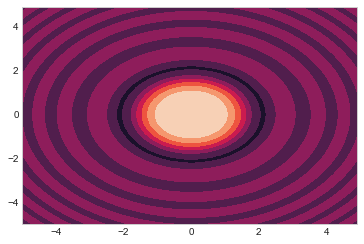

In [9]:
### usage of meshgrid
_x = np.arange(-5, 5, 0.1)
_y = np.arange(-5, 5, 0.1)
_xx, _yy = np.meshgrid(_x, _y, sparse=True)
_z = np.sin(_xx**2 + _yy**2) / (_xx**2 + _yy**2)
h = plt.contourf(_x, _y, _z)

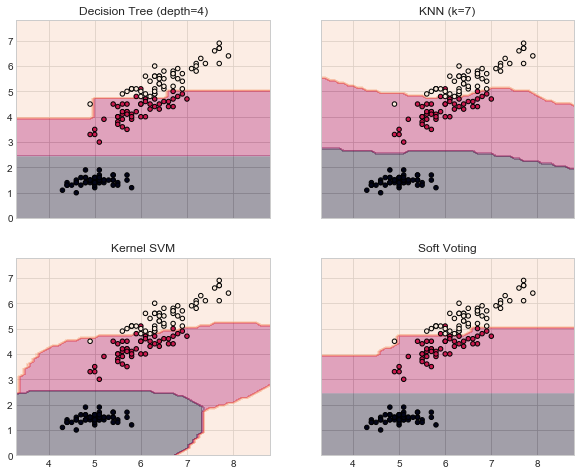

In [15]:
# Plotting decision regions
x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1
y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

f, axarr = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(10, 8))

for idx, clf, tt in zip(product([0, 1], [0, 1]),
                        [clf1, clf2, clf3, eclf],
                        ['Decision Tree (depth=4)', 'KNN (k=7)', 'Kernel SVM', 'Soft Voting']):

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    axarr[idx[0], idx[1]].contourf(xx, yy, Z, alpha=0.4)
    axarr[idx[0], idx[1]].scatter(x[:, 0], x[:, 1], c=y, s=20, edgecolor='k')
    axarr[idx[0], idx[1]].set_title(tt)

plt.show()

## 参考资料

- [最近邻居法 wiki](https://zh.wikipedia.org/zh-hans/%E6%9C%80%E8%BF%91%E9%84%B0%E5%B1%85%E6%B3%95)
- [K NEAREST NEIGHBOR 算法 coolshell](https://coolshell.cn/articles/8052.html)
- []()
- []()